In [1]:
import sqlite3
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

def save_pkl(variable, name):
    name = name + '.pkl'
    output = open(name, 'wb')
    pickle.dump(variable, output)
    output.close()

def load_pkl(name):
    name = name + '.pkl'
    pkl_file = open(name, 'rb')
    result = pickle.load(pkl_file)
    pkl_file.close()
    return result

## From SQL to pandas pkl

In [2]:
def sql_fetch(con):
 
    cursorObj = con.cursor()
 
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
 
    return (cursorObj.fetchall()[0][0])

con = sqlite3.connect('all-the-news.db')
table_name = sql_fetch(con)
query = "SELECT * FROM {}".format(table_name)
df = pd.read_sql_query(query, con)

save_pkl(df, 'news')

## Loading data from pkl

In [3]:
df = load_pkl('news')

In [4]:
print('Data shape is {}'.format(df.shape))
print('-------------------------------------------------------------------------------')

print('Columns are {}'.format([i for i in df.columns]))
print('-------------------------------------------------------------------------------')
print('To understand it, see the first entry')
print(df.iloc[0])
print('-------------------------------------------------------------------------------')

print('For example, the set of values of the category variable is {}'.format([i for i in set(\
                                                                        df['category'].values)]))
print('-------------------------------------------------------------------------------')
print('Let\'s explore nones')
print(df.isna().sum())

Data shape is (204135, 12)
-------------------------------------------------------------------------------
Columns are ['id', 'title', 'author', 'date', 'content', 'year', 'month', 'publication', 'category', 'digital', 'section', 'url']
-------------------------------------------------------------------------------
To understand it, see the first entry
id                                                             1
title          Agent Cooper in Twin Peaks is the audience: on...
author                                        \nTasha Robinson\n
date                                                  2017-05-31
content              And never more so than in Showtime’s new...
year                                                        2017
month                                                          5
publication                                                Verge
category                                                Longform
digital                                                     

In [5]:
# We do not need this columns for sure
df.drop(['digital', 'url'], axis = 1, inplace=True)

# As columns with date and context are crucial for our analysis, we drop rows where they are Nones
df = df[-df.isna()['date']]
df = df[-df.isna()['content']]

df.isna().sum()

id                  0
title               0
author          17747
date                0
content             0
year                0
month               0
publication         0
category        26650
section        115827
dtype: int64

In [6]:
date = np.array([])

for i in df['date']:
    try:
        date = np.append(date, pd.to_datetime(i))
    except:
        date = np.append(date, pd.to_datetime(i[:10]))

In [7]:
df['date'] = date

In [16]:
df['year'] = pd.to_numeric(df['year'], downcast='integer')

In [18]:
df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [8]:
save_pkl(df, 'news')

# Finally, we have the dataset we need, preprocesses and ready for the sentimential analysis

In [63]:
df = load_pkl('news')

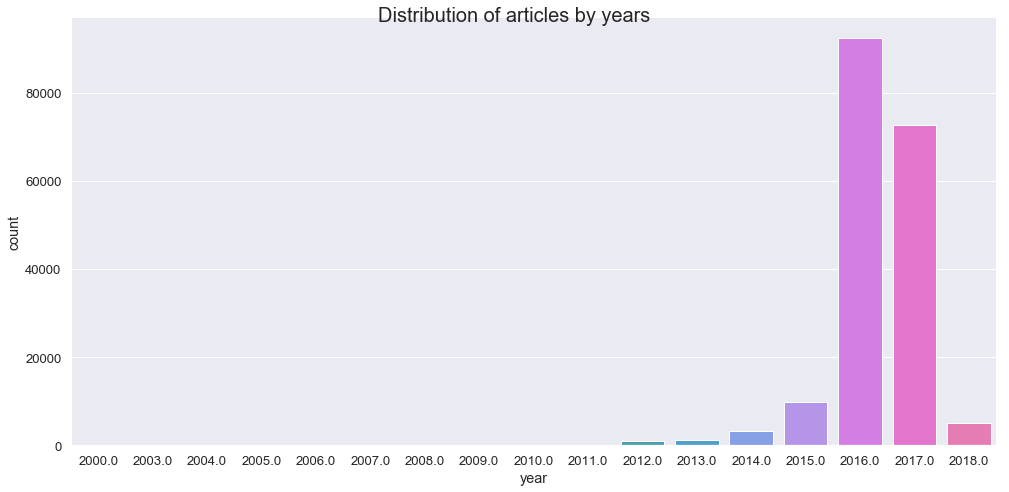

In [64]:
sns.set(font_scale=1.2)
g = sns.catplot(x="year", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by years', fontsize = 20)
g.savefig("years.png")

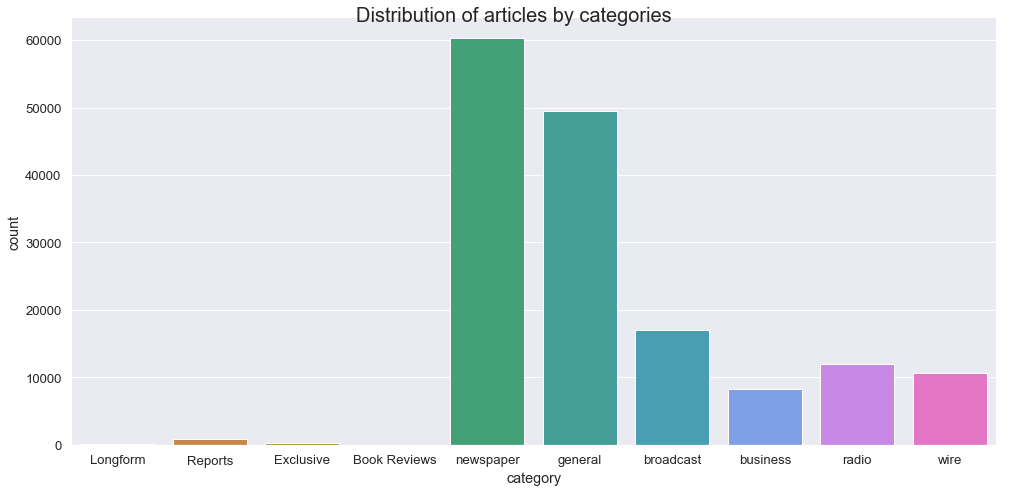

In [65]:
g = sns.catplot(x="category", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by categories', fontsize = 20)
g.savefig("categories.png")

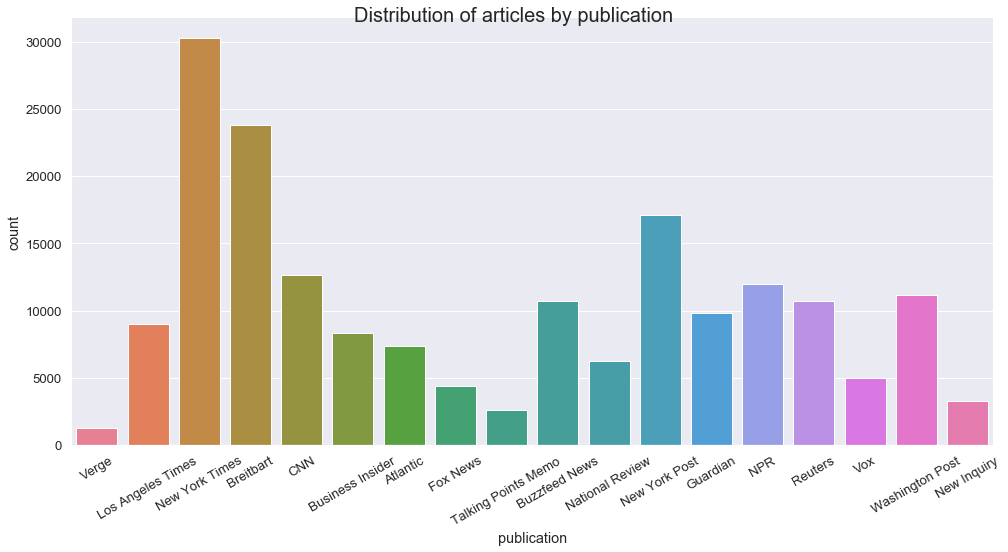

In [66]:
sns.set(font_scale=1.2)
g = sns.catplot(x="publication", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by publication', fontsize = 20)
plt.setp(g.ax.get_xticklabels(), rotation=30);
g.savefig("publications.png")

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [87]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return (score['compound'])

In [88]:
for i in range(20):
    sentiment_analyzer_scores(df['title'][i])

In [89]:
df['content'][4].split('.')

['      Ahead of Black Panther’s 2018 theatrical release, Marvel turned to Ta-Nehisi Coates to breathe new life into the nation of Wakanda',
 ' “I made most of my career analyzing the forces of racism and white supremacy as an idea in America',
 ' But what you begin to realize after you do that long enough — you aren’t talking about anything specific',
 ' In other words, you aren’t really talking about whether some people have lighter skin or some people have blonde hair or some people have blue eyes or some people have kinky hair',
 ' You’re talking about power',
 '” This is the voice of journalist, cultural critic, and best-selling author Ta-Nehisi Coates',
 ' Coates is the writer of Marvel’s latest entry in the Black Panther canon, Black Panther: A Nation Under Our Feet',
 ' With the book, he’s been charged with turning one of Marvel’s least understood and appreciated black characters into a marquee superhero',
 'Even if you don’t read comics, you likely know about the character Bla

In [156]:
def plot_histogram(text):
    
    def bins(x):
        if x <=-0.9:
            return -0.9
        elif x >-0.9 and x <= -0.8:
            return -0.8
        elif x >-0.8 and x <= -0.7:
            return -0.7
        elif x >-0.7 and x <= -0.6:
            return -0.6
        elif x >-0.6 and x <= -0.5:
            return -0.5
        elif x >-0.5 and x <= -0.4:
            return -0.4
        elif x >-0.4 and x <= -0.3:
            return -0.3
        elif x >-0.3 and x <= -0.2:
            return -0.2
        elif x >-0.2 and x <= -0.1:
            return -0.1
        elif x >-0.1 and x <= -0.0:
            return 0
        elif x >-0.0 and x <= 0.1:
            return 0.1
        elif x >0.1 and x <= 0.2:
            return 0.2
        elif x >0.2 and x <= 0.3:
            return 0.3
        elif x >0.3 and x <= 0.4:
            return 0.4
        elif x >0.4 and x <= 0.5:
            return 0.5
        elif x >0.5 and x <= 0.6:
            return 0.6
        elif x >0.6 and x <= 0.7:
            return 0.7
        elif x >0.7 and x <= 0.8:
            return 0.8
        elif x >0.8 and x <= 0.9:
            return 0.9
        elif x >0.9 and x <= 1:
            return 1
    
    sentences = text.split('.')
    compounds = []
    for i in sentences:
        compounds.append(sentiment_analyzer_scores(i))
    compounds = pd.DataFrame(compounds)
    compounds[0]=compounds[0].apply(bins)
    f, ax = plt.subplots(figsize = (10,5))
    sns.distplot(compounds[0], color="c")

/Users/polina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


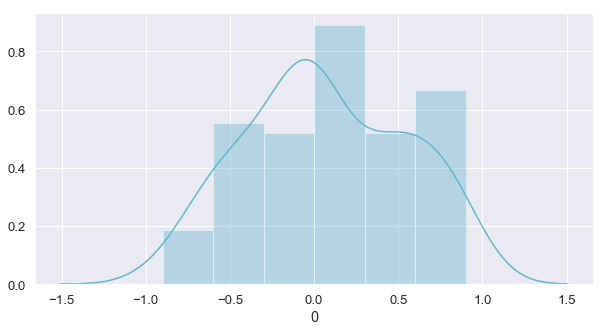

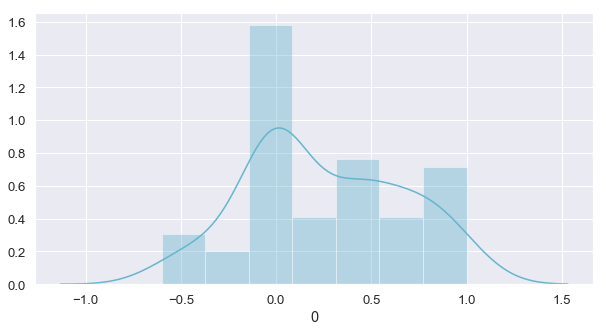

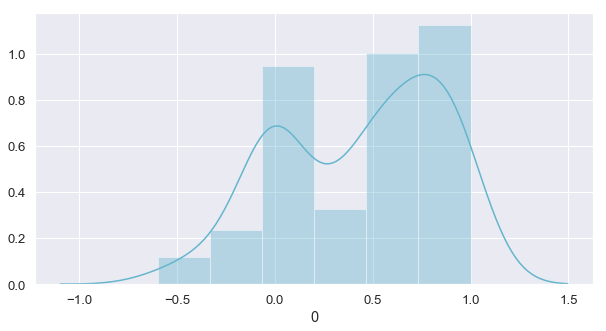

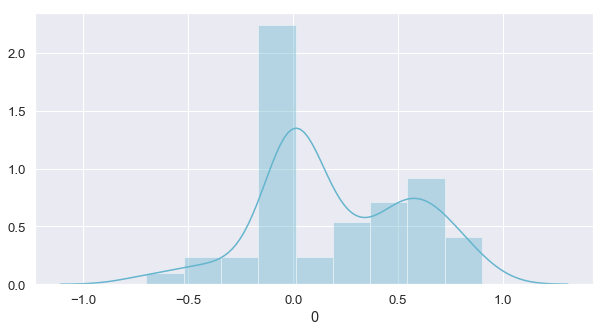

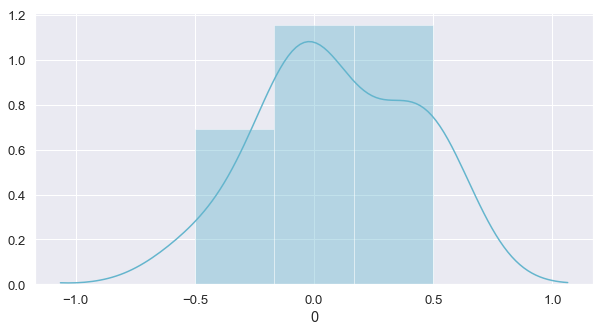

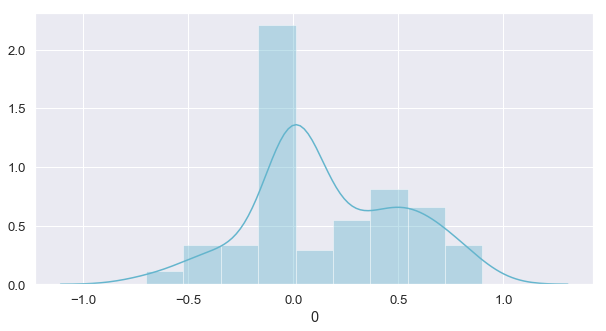

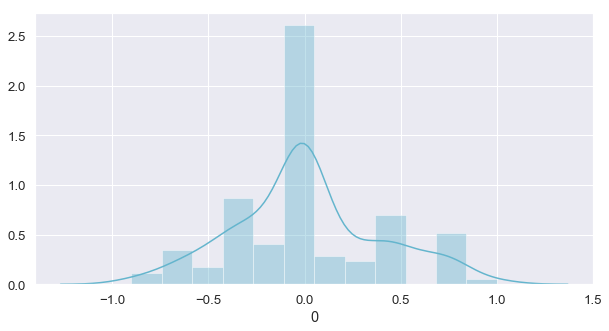

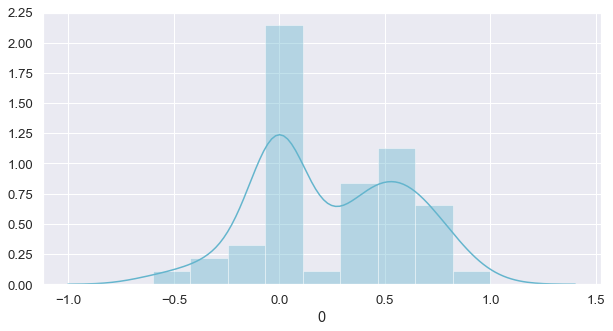

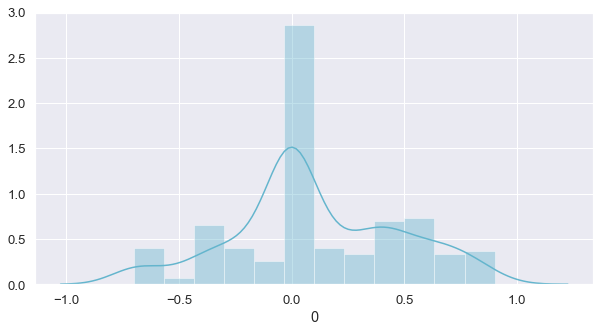

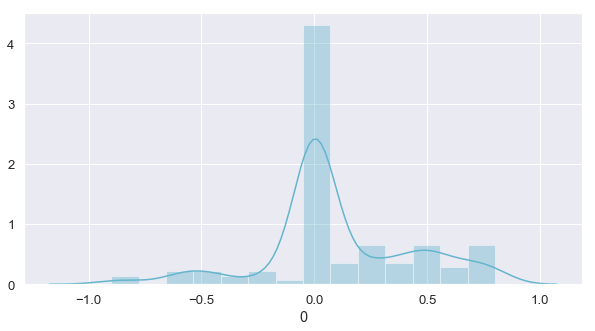

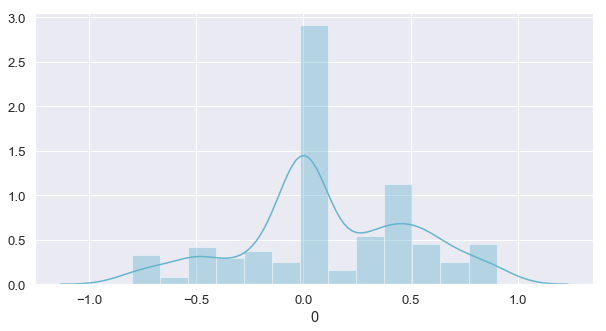

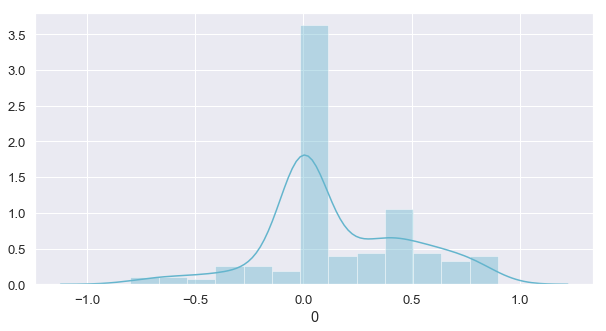

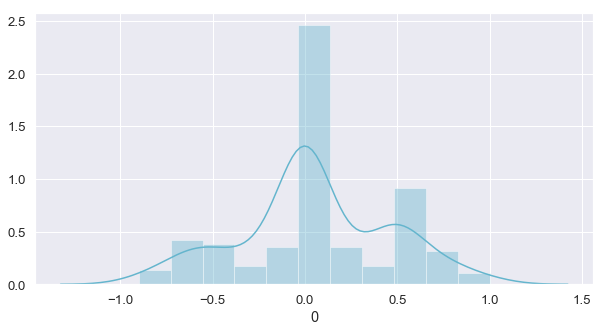

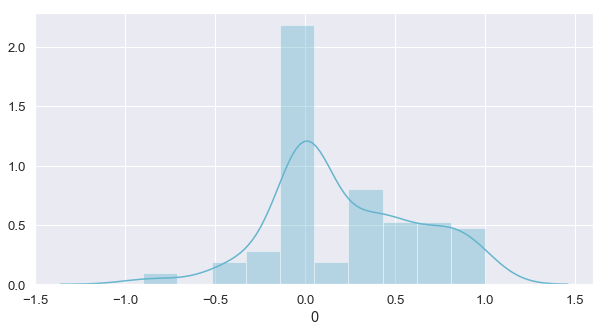

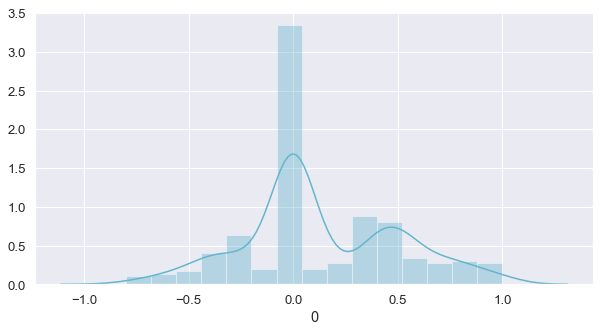

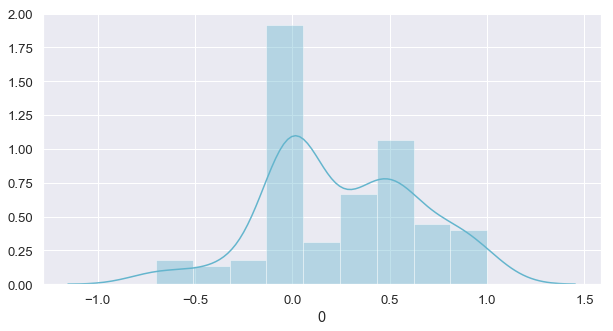

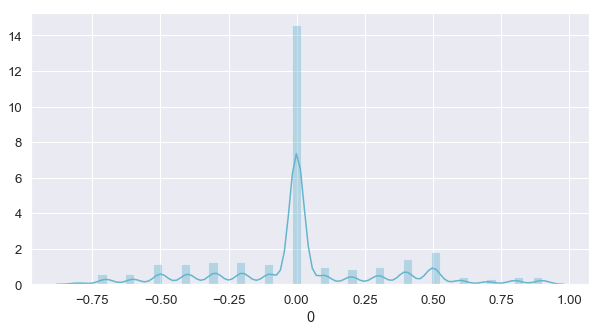

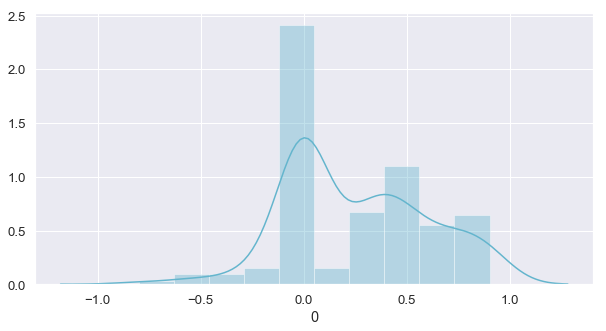

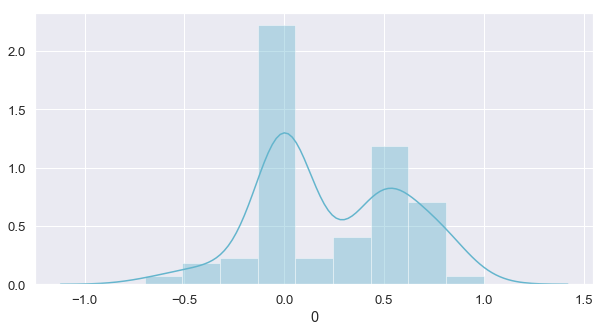

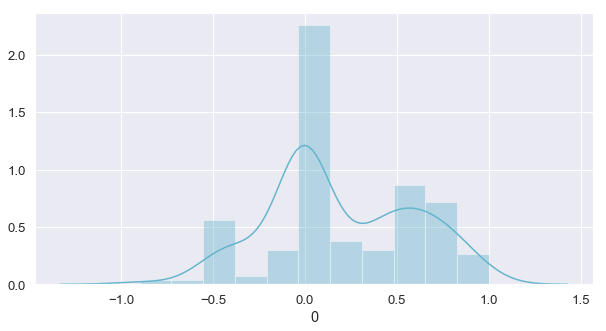

In [160]:
for i in range(20):
    plot_histogram(df['content'][i])